In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/ara_proje_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/benign/aug_0_5669.png  
  inflating: train/benign/aug_0_6396.png  
  inflating: train/benign/aug_0_821.png  
  inflating: train/benign/aug_0_4940.png  
  inflating: train/benign/aug_0_10.png  
  inflating: train/benign/aug_0_9248.png  
  inflating: train/benign/aug_0_6968.png  
  inflating: train/benign/aug_0_6599.png  
  inflating: train/benign/aug_0_6012.png  
  inflating: train/benign/aug_0_2732.png  
  inflating: train/benign/aug_0_6190.png  
  inflating: train/benign/aug_0_824.png  
  inflating: train/benign/aug_0_9575.png  
  inflating: train/benign/aug_0_9135.png  
  inflating: train/benign/aug_0_7581.png  
  inflating: train/benign/aug_0_9464.png  
  inflating: train/benign/aug_0_3309.png  
  inflating: train/benign/aug_0_8782.png  
  inflating: train/benign/aug_0_6508.png  
  inflating: train/benign/aug_0_5852.png  
  inflating: train/benign/aug_0_783.png  
  inflating: train/benign/aug_0_3259.png  
  inflat

In [3]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint




# --- 1. YENİ PARAMETRELER ---
DATA_ROOT = "/content/" # Olası kök dizin
IMAGE_SIZE = (224, 224)
NEW_LEARNING_RATE = 0.00001
MAX_EPOCHS = 50
PATIENCE = 10
BATCH_SIZE = 32

# --- 2. CALLBACK'LERİN TANIMLANMASI ---

# 5 epoch boyunca val_loss iyileşmezse eğitimi durdur ve en iyi ağırlıkları geri yükle
early_stopping = EarlyStopping(
monitor='val_loss',
patience=PATIENCE,# Sabır değeri
restore_best_weights=True,# En iyi ağırlıkları yükle
verbose=1
)

# Her epoch sonunda en iyi val_loss değerine sahip ağırlıkları kaydet
checkpoint_filepath = '/tmp/Xception_best_weights_lr0001.weights.h5'
model_checkpoint = ModelCheckpoint(
filepath=checkpoint_filepath,
monitor='val_loss',
save_best_only=True,
verbose=1
)

# --- 3. VERİ YÜKLEYİCİLERİ (DOĞRU NORMALİZASYON) ---
datagen_rescale = ImageDataGenerator(rescale=1./255) # 0-1 Normalizasyonu

train_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'train', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical'
)
valid_generator = datagen_rescale.flow_from_directory(
DATA_ROOT + 'valid', target_size=IMAGE_SIZE, batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
)

# --- 4. MODEL TANIMI (Feature Extraction) ---


base_model = Xception(weights='imagenet',
                      include_top=False,
                      pooling='avg',
                      input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))



base_model.trainable = False

x = base_model.output
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

# --- 5. MODELİ DERLEME VE EĞİTİM ---
print(f"Xception modeli LR={NEW_LEARNING_RATE} ile derleniyor...")

model.compile(optimizer=Adam(learning_rate=NEW_LEARNING_RATE),
loss='categorical_crossentropy',
metrics=['accuracy'])

print(f"\n--- ResNet Eğitimi Başlıyor (LR: {NEW_LEARNING_RATE}, Max Epoch: {MAX_EPOCHS}) ---\n")

history = model.fit(
train_generator,
epochs=MAX_EPOCHS,
validation_data=valid_generator,
callbacks=[early_stopping, model_checkpoint] # Callbacks eklendi
)

Found 7031 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Xception modeli LR=1e-05 ile derleniyor...

--- ResNet Eğitimi Başlıyor (LR: 1e-05, Max Epoch: 50) ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.3468 - loss: 1.1559
Epoch 1: val_loss improved from inf to 1.03620, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 103s 336ms/step - accuracy: 0.3468 - loss: 1.1559 - val_accuracy: 0.4583 - val_loss: 1.0362
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.3594 - loss: 1.1324
Epoch 2: val_loss improved from 1.03620 to 1.01789, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.3594 - loss: 1.1324 - val_accuracy: 0.4750 - val_loss: 1.0179
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3764 - loss: 1.1108
Epoch 3: val_loss improved from 1.01789 to 0.99667, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.3765 - loss: 1.1108 - val_accuracy: 0.5167 - val_loss: 0.9967
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.3935 - loss: 1.0876
Epoch 4: val_loss improved from 0.99667 to 0.97918, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.3936 - loss: 1.0875 - val_accuracy: 0.5417 - val_loss: 0.9792
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.4271 - loss: 1.0568
Epoch 5: val_loss improved from 0.97918 to 0.96168, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.4271 - loss: 1.0568 - val_accuracy: 0.5583 - val_loss: 0.9617
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4481 - loss: 1.0453
Epoch 6: val_loss improved from 0.96168 to 0.94809, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.4481 - loss: 1.0452 - val_accuracy: 0.6083 - val_loss: 0.9481
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.4655 - loss: 1.0291
Epoch 7: val_loss improved from 0.94809 to 0.93334, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.4655 - loss: 1.0291 - val_accuracy: 0.6167 - val_loss: 0.9333
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4807 - loss: 1.0077
Epoch 8: val_loss improved from 0.93334 to 0.92256, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.4807 - loss: 1.0077 - val_accuracy: 0.6417 - val_loss: 0.9226
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.4890 - loss: 1.0041
Epoch 9: val_loss improved from 0.92256 to 0.90820, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.4891 - loss: 1.0040 - val_accuracy: 0.6583 - val_loss: 0.9082
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5182 - loss: 0.9838
Epoch 10: val_loss improved from 0.90820 to 0.89826, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.5182 - loss: 0.9838 - val_accuracy: 0.6500 - val_loss: 0.8983
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5294 - loss: 0.9693
Epoch 11: val_loss improved from 0.89826 to 0.88782, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.5295 - loss: 0.9693 - val_accuracy: 0.6500 - val_loss: 0.8878
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5287 - loss: 0.9662
Epoch 12: val_loss improved from 0.88782 to 0.87865, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.5287 - loss: 0.9661 - val_accuracy: 0.6417 - val_loss: 0.8786
Epoch 13/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5469 - loss: 0.9472
Epoch 13: val_loss improved from 0.87865 to 0.87008, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.5469 - loss: 0.9472 - val_accuracy: 0.6500 - val_loss: 0.8701
Epoch 14/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5617 - loss: 0.9355
Epoch 14: val_loss improved from 0.87008 to 0.86259, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5617 - loss: 0.9355 - val_accuracy: 0.6583 - val_loss: 0.8626
Epoch 15/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5755 - loss: 0.9313
Epoch 15: val_loss improved from 0.86259 to 0.85718, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.5754 - loss: 0.9313 - val_accuracy: 0.6750 - val_loss: 0.8572
Epoch 16/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.5809 - loss: 0.9217
Epoch 16: val_loss improved from 0.85718 to 0.84986, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5809 - loss: 0.9217 - val_accuracy: 0.6750 - val_loss: 0.8499
Epoch 17/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.5757 - loss: 0.9147
Epoch 17: val_loss improved from 0.84986 to 0.84363, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 91ms/step - accuracy: 0.5758 - loss: 0.9147 - val_accuracy: 0.6583 - val_loss: 0.8436
Epoch 18/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.5816 - loss: 0.9043
Epoch 18: val_loss improved from 0.84363 to 0.83929, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.5817 - loss: 0.9043 - val_accuracy: 0.6750 - val_loss: 0.8393
Epoch 19/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.5972 - loss: 0.8894
Epoch 19: val_loss improved from 0.83929 to 0.83208, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.5972 - loss: 0.8894 - val_accuracy: 0.6750 - val_loss: 0.8321
Epoch 20/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6030 - loss: 0.8874
Epoch 20: val_loss improved from 0.83208 to 0.82582, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6030 - loss: 0.8874 - val_accuracy: 0.6500 - val_loss: 0.8258
Epoch 21/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6092 - loss: 0.8794
Epoch 21: val_loss improved from 0.82582 to 0.82154, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6092 - loss: 0.8794 - val_accuracy: 0.6500 - val_loss: 0.8215
Epoch 22/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6023 - loss: 0.8823
Epoch 22: val_loss improved from 0.82154 to 0.81730, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6023 - loss: 0.8823 - val_accuracy: 0.6500 - val_loss: 0.8173
Epoch 23/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6117 - loss: 0.8684
Epoch 23: val_loss improved from 0.81730 to 0.81405, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6117 - loss: 0.8684 - val_accuracy: 0.6500 - val_loss: 0.8141
Epoch 24/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6030 - loss: 0.8690
Epoch 24: val_loss improved from 0.81405 to 0.81023, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6031 - loss: 0.8690 - val_accuracy: 0.6417 - val_loss: 0.8102
Epoch 25/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6126 - loss: 0.8568
Epoch 25: val_loss improved from 0.81023 to 0.80489, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6126 - loss: 0.8568 - val_accuracy: 0.6500 - val_loss: 0.8049
Epoch 26/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6221 - loss: 0.8513
Epoch 26: val_loss improved from 0.80489 to 0.79885, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6221 - loss: 0.8513 - val_accuracy: 0.6500 - val_loss: 0.7989
Epoch 27/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6286 - loss: 0.8405
Epoch 27: val_loss improved from 0.79885 to 0.79491, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6286 - loss: 0.8405 - val_accuracy: 0.6417 - val_loss: 0.7949
Epoch 28/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6243 - loss: 0.8451
Epoch 28: val_loss improved from 0.79491 to 0.79353, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6243 - loss: 0.8451 - val_accuracy: 0.6417 - val_loss: 0.7935
Epoch 29/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6376 - loss: 0.8365
Epoch 29: val_loss improved from 0.79353 to 0.79097, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6376 - loss: 0.8365 - val_accuracy: 0.6417 - val_loss: 0.7910
Epoch 30/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6295 - loss: 0.8374
Epoch 30: val_loss improved from 0.79097 to 0.78879, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6295 - loss: 0.8374 - val_accuracy: 0.6417 - val_loss: 0.7888
Epoch 31/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6324 - loss: 0.8370
Epoch 31: val_loss improved from 0.78879 to 0.78549, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6324 - loss: 0.8370 - val_accuracy: 0.6417 - val_loss: 0.7855
Epoch 32/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6333 - loss: 0.8330
Epoch 32: val_loss improved from 0.78549 to 0.78380, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.6333 - loss: 0.8330 - val_accuracy: 0.6417 - val_loss: 0.7838
Epoch 33/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6399 - loss: 0.8173
Epoch 33: val_loss improved from 0.78380 to 0.77936, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 20s 92ms/step - accuracy: 0.6398 - loss: 0.8173 - val_accuracy: 0.6417 - val_loss: 0.7794
Epoch 34/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6415 - loss: 0.8209
Epoch 34: val_loss improved from 0.77936 to 0.77835, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6415 - loss: 0.8209 - val_accuracy: 0.6417 - val_loss: 0.7784
Epoch 35/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6426 - loss: 0.8131
Epoch 35: val_loss improved from 0.77835 to 0.77380, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6426 - loss: 0.8131 - val_accuracy: 0.6417 - val_loss: 0.7738
Epoch 36/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6404 - loss: 0.8162
Epoch 36: val_loss improved from 0.77380 to 0.77125, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6404 - loss: 0.8161 - val_accuracy: 0.6417 - val_loss: 0.7712
Epoch 37/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6492 - loss: 0.7997
Epoch 37: val_loss improved from 0.77125 to 0.76958, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6492 - loss: 0.7998 - val_accuracy: 0.6417 - val_loss: 0.7696
Epoch 38/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6536 - loss: 0.8018
Epoch 38: val_loss improved from 0.76958 to 0.76671, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6536 - loss: 0.8018 - val_accuracy: 0.6417 - val_loss: 0.7667
Epoch 39/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6451 - loss: 0.8119
Epoch 39: val_loss improved from 0.76671 to 0.76395, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6452 - loss: 0.8119 - val_accuracy: 0.6417 - val_loss: 0.7639
Epoch 40/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6557 - loss: 0.7970
Epoch 40: val_loss improved from 0.76395 to 0.76125, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 93ms/step - accuracy: 0.6557 - loss: 0.7970 - val_accuracy: 0.6417 - val_loss: 0.7612
Epoch 41/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6505 - loss: 0.7979
Epoch 41: val_loss improved from 0.76125 to 0.76013, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.6505 - loss: 0.7979 - val_accuracy: 0.6417 - val_loss: 0.7601
Epoch 42/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6512 - loss: 0.7950
Epoch 42: val_loss improved from 0.76013 to 0.75816, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6512 - loss: 0.7950 - val_accuracy: 0.6417 - val_loss: 0.7582
Epoch 43/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6684 - loss: 0.7871
Epoch 43: val_loss improved from 0.75816 to 0.75628, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6683 - loss: 0.7872 - val_accuracy: 0.6417 - val_loss: 0.7563
Epoch 44/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6548 - loss: 0.7919
Epoch 44: val_loss improved from 0.75628 to 0.75615, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6548 - loss: 0.7919 - val_accuracy: 0.6417 - val_loss: 0.7561
Epoch 45/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6535 - loss: 0.7879
Epoch 45: val_loss improved from 0.75615 to 0.75305, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6536 - loss: 0.7879 - val_accuracy: 0.6417 - val_loss: 0.7530
Epoch 46/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.6648 - loss: 0.7781
Epoch 46: val_loss improved from 0.75305 to 0.75138, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6648 - loss: 0.7781 - val_accuracy: 0.6417 - val_loss: 0.7514
Epoch 47/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6758 - loss: 0.7803
Epoch 47: val_loss improved from 0.75138 to 0.74845, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 97ms/step - accuracy: 0.6758 - loss: 0.7803 - val_accuracy: 0.6500 - val_loss: 0.7484
Epoch 48/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6668 - loss: 0.7756
Epoch 48: val_loss improved from 0.74845 to 0.74721, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6668 - loss: 0.7756 - val_accuracy: 0.6500 - val_loss: 0.7472
Epoch 49/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.6715 - loss: 0.7656
Epoch 49: val_loss improved from 0.74721 to 0.74588, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.6715 - loss: 0.7657 - val_accuracy: 0.6500 - val_loss: 0.7459
Epoch 50/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.6623 - loss: 0.7809
Epoch 50: val_loss improved from 0.74588 to 0.74452, saving model to /tmp/Xception_best_weights_lr0001.weights.h5


220/220 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6623 - loss: 0.7809 - val_accuracy: 0.6500 - val_loss: 0.7445
Restoring model weights from the end of the best epoch: 50.


In [4]:
# Eğitimin temel metriklerini yazdıralım
print("\n--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---")

# En iyi Validasyon Accuracy'i bulma
best_val_acc = max(history.history['val_accuracy'])
print(f"En Yüksek Validasyon Accuracy: {best_val_acc:.4f}")

# Sonuçları Training Seti üzerinde değerlendirelim
# Training Seti performansı (genellikle çok yüksektir)
train_results = model.evaluate(train_generator, verbose=0)
print(f"Training Seti Accuracy: {train_results[1]:.4f}")
print(f"Training Seti Loss: {train_results[0]:.4f}")


--- EĞİTİM VE VALIDASYON ÖZETİ (HISTORY) ---
En Yüksek Validasyon Accuracy: 0.6750
Training Seti Accuracy: 0.7087
Training Seti Loss: 0.7329


Found 115 images belonging to 3 classes.

--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---



/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step
Test Accuracy: 0.7217
Test Recall (Duyarlılık): 0.7637
Test Precision (Kesinlik): 0.7126
Test F1-Score: 0.7173


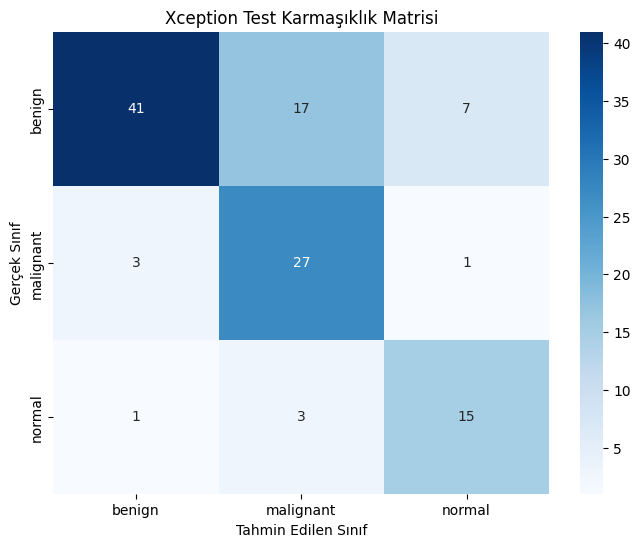


--- Tabloya Eklenecek Sonuçlar ---

Xception | Accuracy: 0.7217 | Recall: 0.7637 | Precision: 0.7126 | F1-Score: 0.7173

Karmaşıklık Matrisi (Xception_confusion_matrix.png) oluşturuldu.


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# --- 1. TEST VERİ YÜKLEYİCİSİ (Normalizasyon: 0-1) ---
# Makale ayarlarına uygun olarak 0-1 normalizasyonunu kullanmalıyız.
datagen_test = ImageDataGenerator(rescale=1./255)

# Test generator'ı oluştur. Shuffle=False kritik!
test_generator = datagen_test.flow_from_directory(
    DATA_ROOT + 'test',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False # Sınıfları doğru eşleştirmek için KARŞTIRMA KAPALI olmalı
)

# --- 2. TAHMİN VE METRİK HESAPLAMA ---

print("\n--- Xception (Makale Ayarları) TEST SETİ Metrikleri Hesaplanıyor ---\n")

test_steps = int(np.ceil(test_generator.samples / BATCH_SIZE))
y_pred_proba_test = model.predict(test_generator, steps=test_steps)
y_pred_test = y_pred_proba_test.argmax(axis=1) # Olasılıklardan en yüksek olanın indeksini al
y_true_test = test_generator.classes # Gerçek etiketleri al

# Sınıf isimlerini al (Örn: benign, malignant, normal)
class_labels = list(test_generator.class_indices.keys())

# Metrikler
accuracy_test = accuracy_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test, average='macro', zero_division=0)
precision_test = precision_score(y_true_test, y_pred_test, average='macro', zero_division=0)
f1_test = f1_score(y_true_test, y_pred_test, average='macro', zero_division=0)

print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Recall (Duyarlılık): {recall_test:.4f}")
print(f"Test Precision (Kesinlik): {precision_test:.4f}")
print(f"Test F1-Score: {f1_test:.4f}")

# --- 3. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX) OLUŞTURMA ---

cm = confusion_matrix(y_true_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
             xticklabels=class_labels,
             yticklabels=class_labels)
plt.xlabel('Tahmin Edilen Sınıf')
plt.ylabel('Gerçek Sınıf')
plt.title('Xception Test Karmaşıklık Matrisi')
plt.savefig('resnet_confusion_matrix.png')
plt.show()

print("\n--- Tabloya Eklenecek Sonuçlar ---\n")
print(f"Xception | Accuracy: {accuracy_test:.4f} | Recall: {recall_test:.4f} | Precision: {precision_test:.4f} | F1-Score: {f1_test:.4f}")
print("\nKarmaşıklık Matrisi (Xception_confusion_matrix.png) oluşturuldu.")